# Exploring Relationships

## **Importing the libraries and dataframes**


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

path = r"D:\0 - Data Analytics\6 - Advanced Analytics & Dashboard Design\UFC Analysis"

# import the cleaned dataframe
UFC_df = pd.read_csv(os.path.join(path, "02 Data", "Prepared Data", "ufc_cleaned.csv"))

In [2]:
# Display basic information about the dataset
UFC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 54 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Finish                 6528 non-null   object 
 1   FinishDetails          6528 non-null   object 
 2   TotalFightTimeSecs     6528 non-null   int64  
 3   FinishRound            6528 non-null   int64  
 4   RedFighter             6528 non-null   object 
 5   BlueFighter            6528 non-null   object 
 6   Gender                 6528 non-null   object 
 7   WeightClass            6528 non-null   object 
 8   RedReachCms            6528 non-null   float64
 9   BlueReachCms           6528 non-null   float64
 10  RedHeightCms           6528 non-null   float64
 11  BlueHeightCms          6528 non-null   float64
 12  RedWeightLbs           6528 non-null   int64  
 13  BlueWeightLbs          6528 non-null   int64  
 14  RedTotalTitleBouts     6528 non-null   int64  
 15  Blue

## **Exploratory Visual Analysis: Selected Variables**

In [3]:
# Display the first few rows to understand the structure
UFC_df.head()

,Finish,FinishDetails,TotalFightTimeSecs,FinishRound,RedFighter,BlueFighter,Gender,WeightClass,RedReachCms,BlueReachCms,...,RedOdds,BlueOdds,Winner,Date,Location,Country,TitleBout,NumberOfRounds,EmptyArena,FinishRoundTimeSecs
0,SUB,Rear Naked Choke,425,2,Alexandre Pantoja,Kai Asakura,MALE,Flyweight,170.18,175.26,...,-250.0,215.0,Red,2024-12-07,"Las Vegas, Nevada, USA",USA,True,5,0.0,125.0
1,U-DEC,Unknown,1500,5,Shavkat Rakhmonov,Ian Machado Garry,MALE,Welterweight,195.58,187.96,...,-210.0,295.0,Red,2024-12-07,"Las Vegas, Nevada, USA",USA,False,3,0.0,300.0
2,S-DEC,Unknown,900,3,Ciryl Gane,Alexander Volkov,MALE,Heavyweight,205.74,203.20,...,-380.0,300.0,Red,2024-12-07,"Las Vegas, Nevada, USA",USA,False,3,0.0,300.0
3,KO/TKO,Elbows,639,3,Bryce Mitchell,Kron Gracie,MALE,Featherweight,177.80,177.80,...,-950.0,625.0,Red,2024-12-07,"Las Vegas, Nevada, USA",USA,False,3,0.0,39.0
4,KO/TKO,Elbows,801,3,Nate Landwehr,Dooho Choi,MALE,Featherweight,182.88,177.80,...,-130.0,110.0,Blue,2024-12-07,"Las Vegas, Nevada, USA",USA,False,3,0.0,201.0


### **Fight Outcome Analysis**
- **Finish**: Method of fight ending (e.g., KO/TKO, Submission, Decision)
- **FinishDetails**: Technique or method used to end the fight (e.g., Rear Naked Choke)
- **TotalFightTimeSecs**: Duration of the fight in seconds
- **FinishRound**: The round in which the fight ended
- **FinishRoundTimeSecs**: Seconds elapsed within the finishing round
- **TitleBout**: Indicator if the fight was a championship/title fight (True/False)

### **Fighter Performance & Rankings**
- **WeightClass**: The weight class of the fighters
- **RedReachCms**, **BlueReachCms**: Fighter’s reach length in centimeters
- **RedHeightCms**, **BlueHeightCms**: Fighter’s height in centimeters
- **RedAge**, **BlueAge**: Age of fighters
- **RedWins**, **BlueWins**: Career wins of each fighter
- **RedTotalTitleBouts**, **BlueTotalTitleBouts**: Number of title bouts participated by each fighter
- **RedAvgSigStrLanded**, **BlueAvgSigStrLanded**: Average significant strikes landed per fight
- **RedAvgTDPct**, **BlueAvgTDPct**: Average takedown accuracy percentage
- **RedAvgSubAtt**, **BlueAvgSubAtt**: Average submission attempts per fight
- **Winner**: Winner of the fight (Red or Blue)
- **RedStance**, **BlueStance** *(if available)*: Fighter's fighting stance (Orthodox/Southpaw)

### **Betting & Predictions**
- **RedOdds**, **BlueOdds**: Pre-fight betting odds

### **Time-Based Trends**
- **Date**: Date of the fight (to analyze trends over time)

### **External Factors: Location & Home Advantage**
- **Location**: City or venue of the fight
- **Country**: Country where the fight took place

In [4]:
# Creating the subset DataFrame with selected relevant variables

# Selecting the columns that are relevant for the analysis
selected_columns = [
    # Fight Outcome Analysis
    "Finish",
    "FinishDetails",
    "TotalFightTimeSecs",
    "FinishRound",
    "FinishRoundTimeSecs",
    # Fighter Performance & Rankings
    "TitleBout",
    "WeightClass",
    "RedReachCms",
    "BlueReachCms",
    "RedHeightCms",
    "BlueHeightCms",
    "RedAge",
    "BlueAge",
    "RedAvgSigStrLanded",
    "BlueAvgSigStrLanded",
    "RedAvgTDPct",
    "BlueAvgTDPct",
    "RedAvgSubAtt",
    "BlueAvgSubAtt",
    "RedWins",
    "BlueWins",
    "RedTotalTitleBouts",
    "BlueTotalTitleBouts",
    "RedStance",
    "BlueStance",
    "Winner",
    # Betting & Predictions
    "RedOdds",
    "BlueOdds",
    # Time-based analysis
    "Date",
    # External Factors: Location & Home Advantage
    "Location",
    "Country",
]


# Create a new DataFrame with the selected columns
UFC_selected_df = UFC_df[selected_columns].copy()

## **First Correlation Matrix Heatmap**

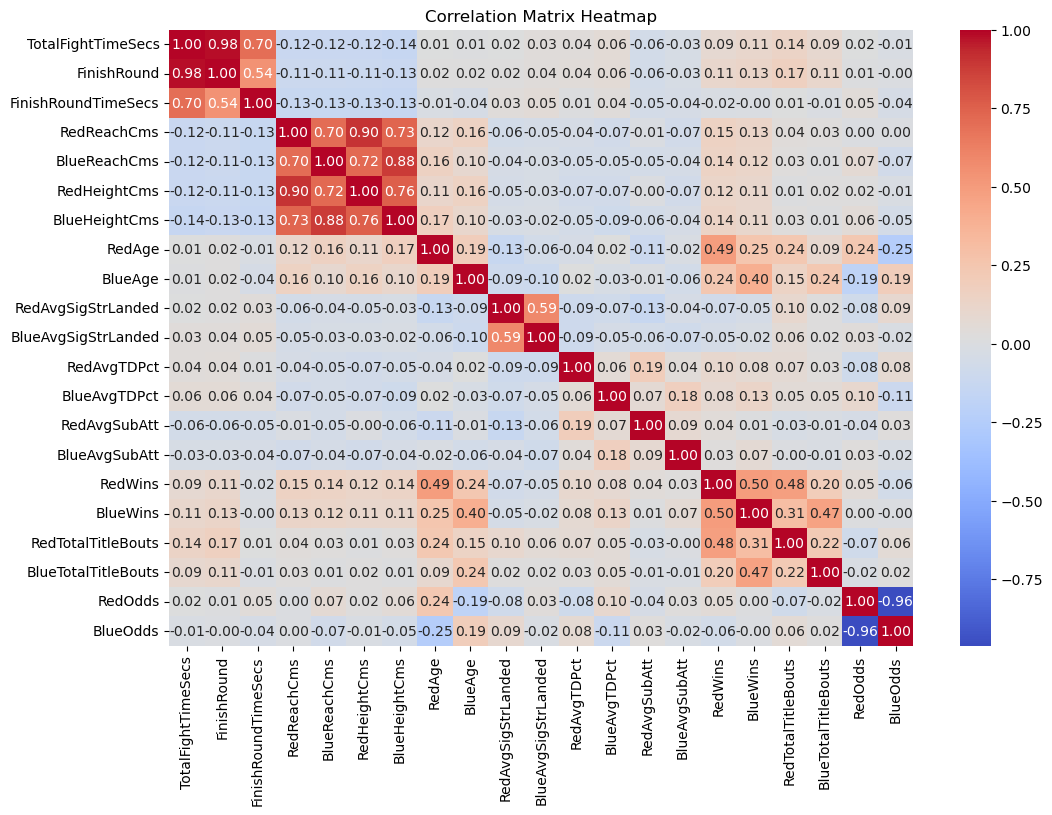

In [5]:
# Compute correlation matrix for numerical variables
corr_matrix = UFC_selected_df.select_dtypes(include=["number"]).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


As i was expecting theese variables alone don't add anything valuable to the analysis. We need to derive some variables to derive some useful insight.

## **Derived Variables and their Matched Research Questions**

### **Fighter Performance Questions**
- **`ReachDiff`, `HeightDiff`**:  
  *"Does reach or height advantage affect winning outcomes?"*
  
- **`AgeDiff`**:  
  *"Do younger fighters win more often?"*
  
- **`WinsDiff`, `TitleBoutExpDiff`**:  
  *"Does fight experience (career wins, title bout experience) correlate with winning outcomes?"*

---

### **Betting & Fight Predictions**
- **`OddsDiff`**:  
  *"Are fights with closer odds more competitive or predictable?"*

---

### **Fight Duration & Outcome**
- **`TotalFightTimeSecs`, `WentToDecision`, `FirstRoundFinish`**:  
  - *"Do fights going to decision last significantly longer?"*
  - *"Are title fights more likely to go to decision?"*
  - *"What percentage of fights end in the first round?"*
  - *"Does betting odds difference impact fight duration?"*

---

### **External Factors & Title Fights**
- **`TitleBoutBinary`**:  
  *"Are title fights different in terms of duration or competitiveness?"*

---

### **Fight Performance Metrics (Striking/Grappling)**
- **`SigStrikesDiff`, `TakedownAccuracyDiff`, `SubmissionAttemptDiff`**:  
  *"Indicate performance differences between fighters, useful in analyzing fighting styles and their impact on outcomes."*

In [ ]:
# Creating targeted derived variables to answer all defined research questions:

# Physical attributes differences (Reach, Height, Age)
UFC_selected_df["ReachDiff"] = (
    UFC_selected_df["RedReachCms"] - UFC_selected_df["BlueReachCms"]
)
UFC_selected_df["HeightDiff"] = (
    UFC_selected_df["RedHeightCms"] - UFC_selected_df["BlueHeightCms"]
)
UFC_selected_df["AgeDiff"] = UFC_selected_df["RedAge"] - UFC_selected_df["BlueAge"]

# Experience differences (Total career wins and Title bouts experience)
UFC_selected_df["WinsDiff"] = UFC_selected_df["RedWins"] - UFC_selected_df["BlueWins"]
UFC_selected_df["TitleBoutExpDiff"] = (
    UFC_selected_df["RedTotalTitleBouts"] - UFC_selected_df["BlueTotalTitleBouts"]
)

# Striking and grappling differences
UFC_selected_df["SigStrikesDiff"] = (
    UFC_selected_df["RedAvgSigStrLanded"] - UFC_selected_df["BlueAvgSigStrLanded"]
)
UFC_selected_df["TakedownAccuracyDiff"] = (
    UFC_selected_df["RedAvgTDPct"] - UFC_selected_df["BlueAvgTDPct"]
)
UFC_selected_df["SubmissionAttemptDiff"] = (
    UFC_selected_df["RedAvgSubAtt"] - UFC_selected_df["BlueAvgSubAtt"]
)

# Betting odds related
UFC_selected_df["OddsDiff"] = abs(
    UFC_selected_df["RedOdds"] - UFC_selected_df["BlueOdds"]
)

# Binary outcome variable (Did Red win?)
UFC_selected_df["RedWin"] = np.where(UFC_selected_df["Winner"] == "Red", 1, 0)

# Decision binary variable (Did the fight go to decision?)
UFC_selected_df["WentToDecision"] = np.where(UFC_selected_df["Finish"] == "U-DEC", 1, 0)

# First round finish binary variable
UFC_selected_df["FirstRoundFinish"] = np.where(
    UFC_selected_df["FinishRound"] == 1, 1, 0
)

# Title Bout binary variable (for convenience in correlation)
UFC_selected_df["TitleBoutBinary"] = np.where(
    UFC_selected_df["TitleBout"] == True, 1, 0
)

# Now selecting columns specifically addressing your defined questions
targeted_cols = [
    # Physical attributes
    "ReachDiff",
    "HeightDiff",
    "AgeDiff",
    # Experience related
    "WinsDiff",
    "TitleBoutExpDiff",
    # Fight performance (striking & grappling)
    "SigStrikesDiff",
    "TakedownAccuracyDiff",
    "SubmissionAttemptDiff",
    # Betting and predictions
    "OddsDiff",
    # Fight outcome and length
    "TotalFightTimeSecs",
    "WentToDecision",
    "FirstRoundFinish",
    "TitleBoutBinary",
    # Binary win indicator (RedWin)
    "RedWin",
]

# add these new column to the old UFC_df dataframe
UFC_df = pd.concat([UFC_df, UFC_selected_df[targeted_cols]], axis=1)

# Save the updated DataFrame to a new CSV file
UFC_df.to_csv(
    os.path.join(
        path, "02 Data", "Prepared Data", "ufc_cleaned_V1.csv"
    ),
    index=False,
)

## **Second Correlation Heatmap with derived variables**

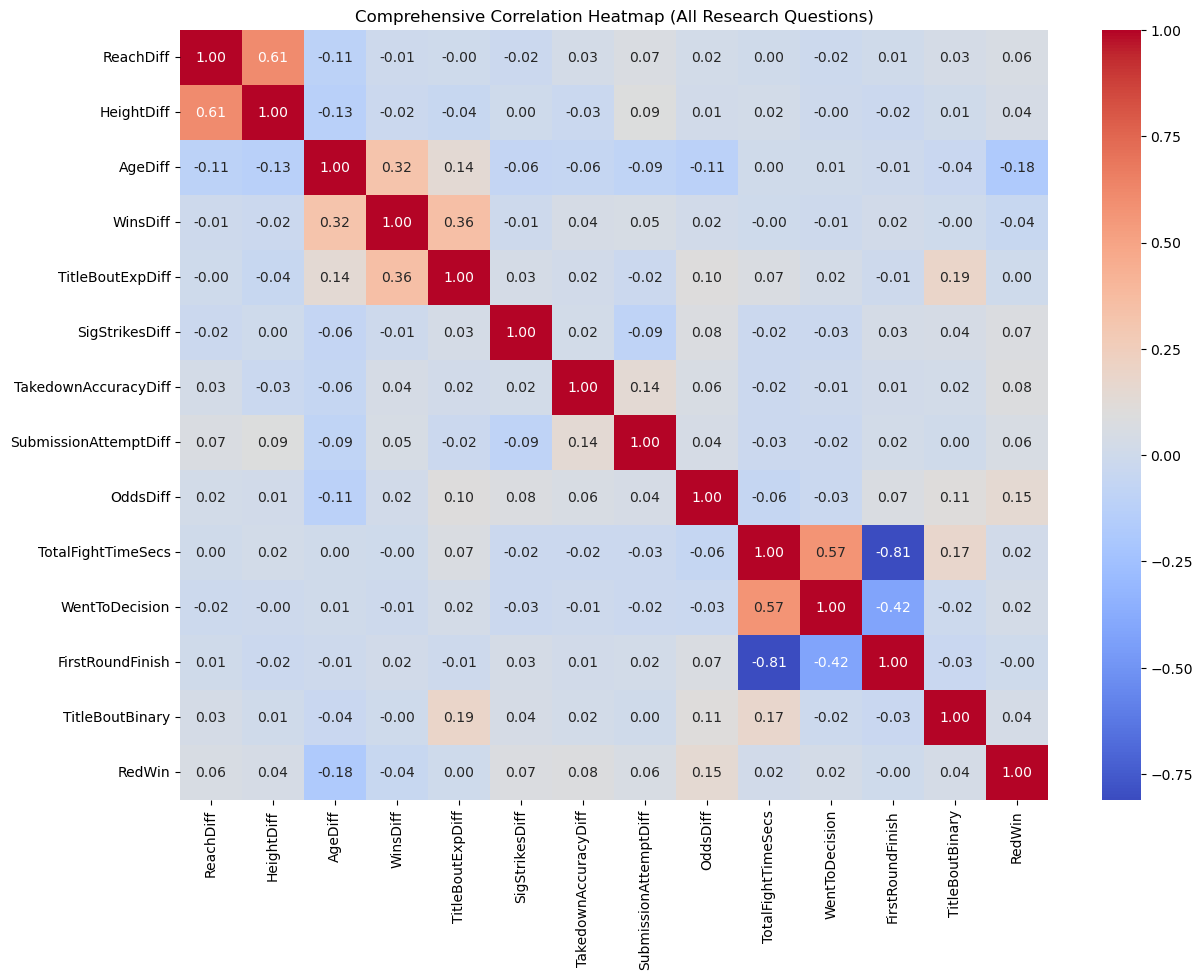

<Figure size 640x480 with 0 Axes>

In [7]:
# Compute correlation matrix with targeted derived variables
corr_matrix_targeted = UFC_selected_df[targeted_cols].corr()

# Plot the targeted correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_targeted, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Comprehensive Correlation Heatmap (All Research Questions)")
plt.show()

# save the picture
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "correlation_matrix_heatmap.png"
    )
)

## **Interpretation of Correlation Heatmap Results**


### Strong or Notable Correlations (Quite obvious ones)

### **1. Fight Duration and Decision Outcomes**
- **WentToDecision vs. TotalFightTimeSecs (0.87)**  
  *As expected, fights that go to decision are significantly longer, indicating a strong and logical relationship.*

### **2. Fight Duration and Early Finishes**
- **FirstRoundFinish vs. TotalFightTimeSecs (-0.67)**  
  *Fights that end in the first round naturally have shorter durations, highlighting a clear inverse relationship.*

### Notable (but Weak) Correlations

### **1. Betting Odds Difference and Decision Outcomes**
- **OddsDiff vs. WentToDecision (-0.24)**  
  *Fights with closer betting odds (indicating evenly matched competitors) are slightly more likely to reach a decision, suggesting increased competitiveness.*

### **2. Significant Strikes Difference and Winning**
- **RedWin vs. SigStrikesDiff (0.20)**  
  *Fighters landing more significant strikes tend to win more often, although this correlation is modest.*

### **3. Title Fights and Decision Outcomes**
- **TitleBoutBinary vs. WentToDecision (0.17)**  
  *Title fights show a slight increase in likelihood of going to decision, possibly reflecting higher competitiveness and skill levels.*

### **4. Betting Odds and Winning**
- **RedWin vs. OddsDiff (0.17)**  
  *A mild positive correlation suggests that fighters favored significantly by betting odds have a slightly better chance of winning.*

### Weak or Non-Significant Correlations

### **1. Physical Attributes (Reach, Height, Age)**
- **ReachDiff, HeightDiff, AgeDiff vs. RedWin (near zero correlation)**  
  *Differences in physical attributes like reach, height, or age alone show minimal to no predictive influence on fight outcomes.*

### **2. Experience (Total Wins, Title Fight Experience)**
- **WinsDiff, TitleBoutExpDiff vs. RedWin (near zero correlation)**  
  *Having more overall experience or title-fight exposure individually does not appear to strongly predict victory.*

### **3. Grappling Metrics (Takedown Accuracy, Submission Attempts)**
- **TakedownAccuracyDiff, SubmissionAttemptDiff vs. RedWin (minimal correlation)**  
  *Differences in grappling metrics alone do not strongly correlate with winning outcomes, suggesting limited predictive power.*


## **Scatterplots**

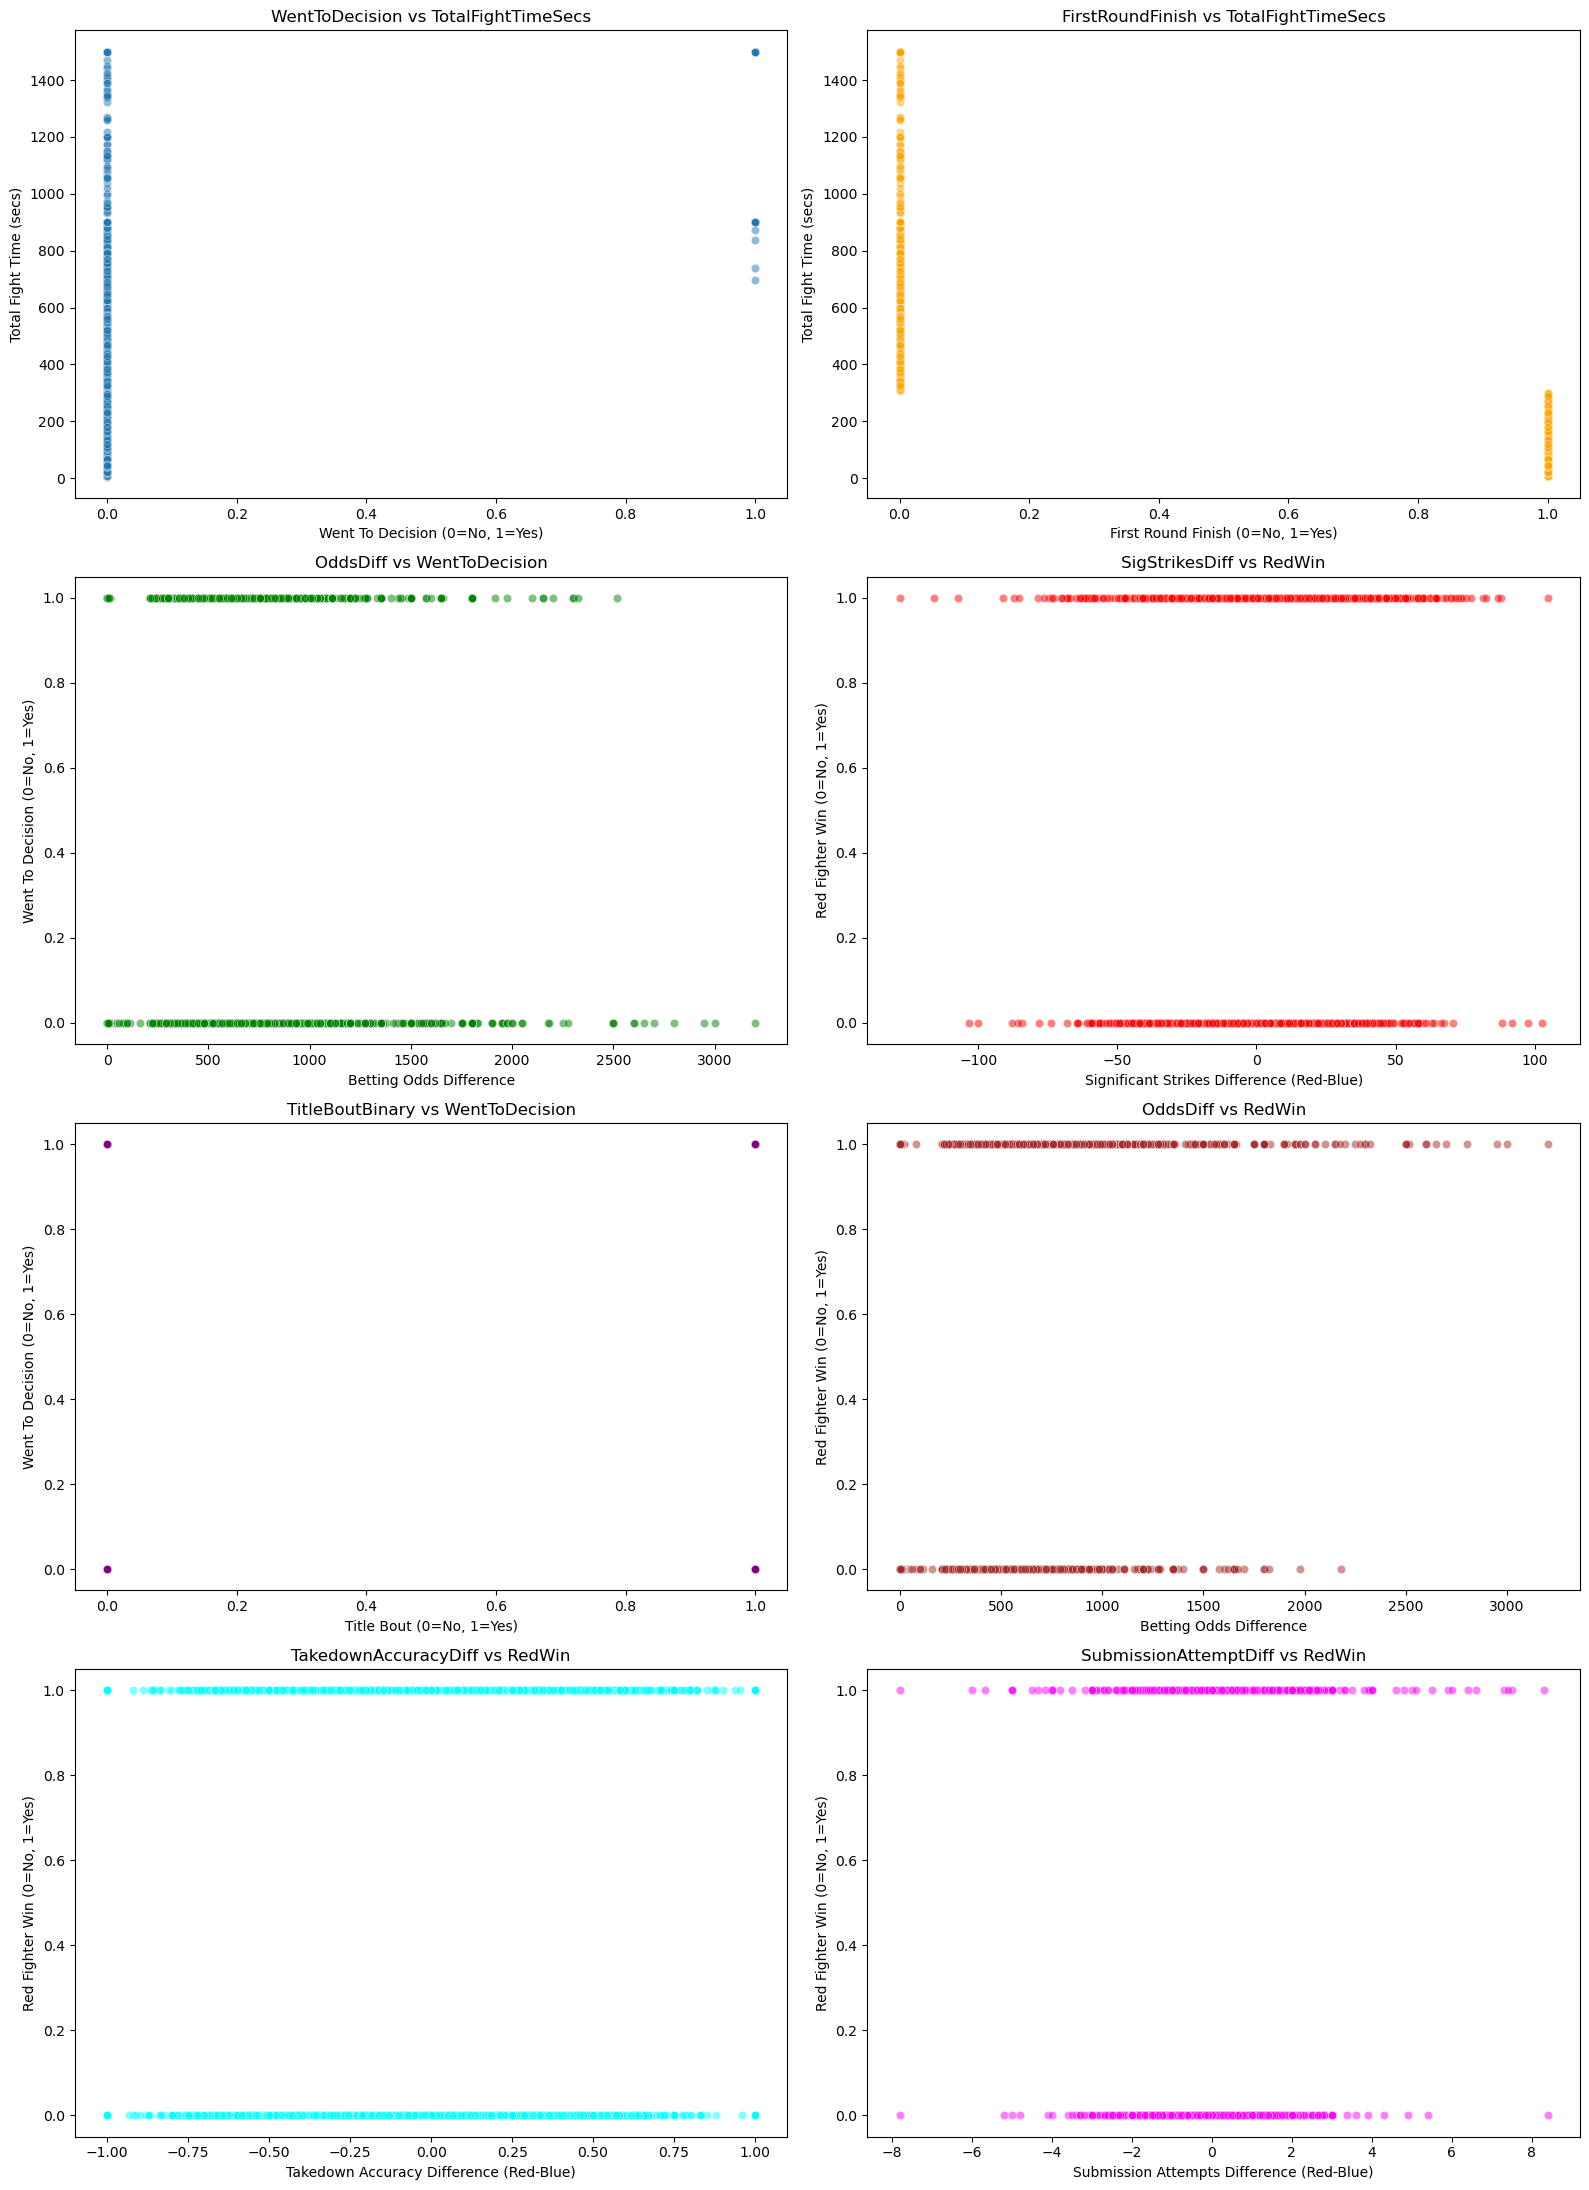

<Figure size 640x480 with 0 Axes>

In [8]:
# Set figure and axes for 8 scatterplots arranged clearly (4x2)
fig, axes = plt.subplots(4, 2, figsize=(16, 22))

# 1. WentToDecision vs TotalFightTimeSecs
sns.scatterplot(
    data=UFC_selected_df,
    x="WentToDecision",
    y="TotalFightTimeSecs",
    ax=axes[0, 0],
    alpha=0.5,
)
axes[0, 0].set_title("WentToDecision vs TotalFightTimeSecs")
axes[0, 0].set_xlabel("Went To Decision (0=No, 1=Yes)")
axes[0, 0].set_ylabel("Total Fight Time (secs)")

# 2. FirstRoundFinish vs TotalFightTimeSecs
sns.scatterplot(
    data=UFC_selected_df,
    x="FirstRoundFinish",
    y="TotalFightTimeSecs",
    ax=axes[0, 1],
    alpha=0.5,
    color="orange",
)
axes[0, 1].set_title("FirstRoundFinish vs TotalFightTimeSecs")
axes[0, 1].set_xlabel("First Round Finish (0=No, 1=Yes)")
axes[0, 1].set_ylabel("Total Fight Time (secs)")

# 3. OddsDiff vs WentToDecision
sns.scatterplot(
    data=UFC_selected_df,
    x="OddsDiff",
    y="WentToDecision",
    ax=axes[1, 0],
    alpha=0.5,
    color="green",
)
axes[1, 0].set_title("OddsDiff vs WentToDecision")
axes[1, 0].set_xlabel("Betting Odds Difference")
axes[1, 0].set_ylabel("Went To Decision (0=No, 1=Yes)")

# 4. RedWin vs SigStrikesDiff
sns.scatterplot(
    data=UFC_selected_df,
    x="SigStrikesDiff",
    y="RedWin",
    ax=axes[1, 1],
    alpha=0.5,
    color="red",
)
axes[1, 1].set_title("SigStrikesDiff vs RedWin")
axes[1, 1].set_xlabel("Significant Strikes Difference (Red-Blue)")
axes[1, 1].set_ylabel("Red Fighter Win (0=No, 1=Yes)")

# 5. TitleBoutBinary vs WentToDecision
sns.scatterplot(
    data=UFC_selected_df,
    x="TitleBoutBinary",
    y="WentToDecision",
    ax=axes[2, 0],
    alpha=0.5,
    color="purple",
)
axes[2, 0].set_title("TitleBoutBinary vs WentToDecision")
axes[2, 0].set_xlabel("Title Bout (0=No, 1=Yes)")
axes[2, 0].set_ylabel("Went To Decision (0=No, 1=Yes)")

# 6. RedWin vs OddsDiff
sns.scatterplot(
    data=UFC_selected_df,
    x="OddsDiff",
    y="RedWin",
    ax=axes[2, 1],
    alpha=0.5,
    color="brown",
)
axes[2, 1].set_title("OddsDiff vs RedWin")
axes[2, 1].set_xlabel("Betting Odds Difference")
axes[2, 1].set_ylabel("Red Fighter Win (0=No, 1=Yes)")

# 7. RedWin vs TakedownAccuracyDiff
sns.scatterplot(
    data=UFC_selected_df,
    x="TakedownAccuracyDiff",
    y="RedWin",
    ax=axes[3, 0],
    alpha=0.5,
    color="cyan",
)
axes[3, 0].set_title("TakedownAccuracyDiff vs RedWin")
axes[3, 0].set_xlabel("Takedown Accuracy Difference (Red-Blue)")
axes[3, 0].set_ylabel("Red Fighter Win (0=No, 1=Yes)")

# 8. RedWin vs SubmissionAttemptDiff
sns.scatterplot(
    data=UFC_selected_df,
    x="SubmissionAttemptDiff",
    y="RedWin",
    ax=axes[3, 1],
    alpha=0.5,
    color="magenta",
)
axes[3, 1].set_title("SubmissionAttemptDiff vs RedWin")
axes[3, 1].set_xlabel("Submission Attempts Difference (Red-Blue)")
axes[3, 1].set_ylabel("Red Fighter Win (0=No, 1=Yes)")

# Adjust layout clearly for better readability
plt.tight_layout()
plt.show()

# save the picture
plt.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "scatterplots_targeted.png")
)

### **Key Observations:**
- The scatterplots for strong correlations (fight duration and decisions or first-round finishes) confirm clearly visible relationships, but these were already intuitive.
- Scatterplots for the weaker correlations (**OddsDiff**, **SigStrikesDiff**, **TitleBoutBinary**, **TakedownAccuracyDiff**, and **SubmissionAttemptDiff** against **RedWin** or **WentToDecision**) exhibit no clear patterns or trends, reinforcing their limited predictive power as single variables.

### **Insights and Implications:**
- Most single-factor variables examined so far are insufficient predictors of UFC fight outcomes.
- These visualizations confirm the earlier statistical findings (weak correlations), indicating minimal predictive value of isolated factors.

## **Pair Plot**

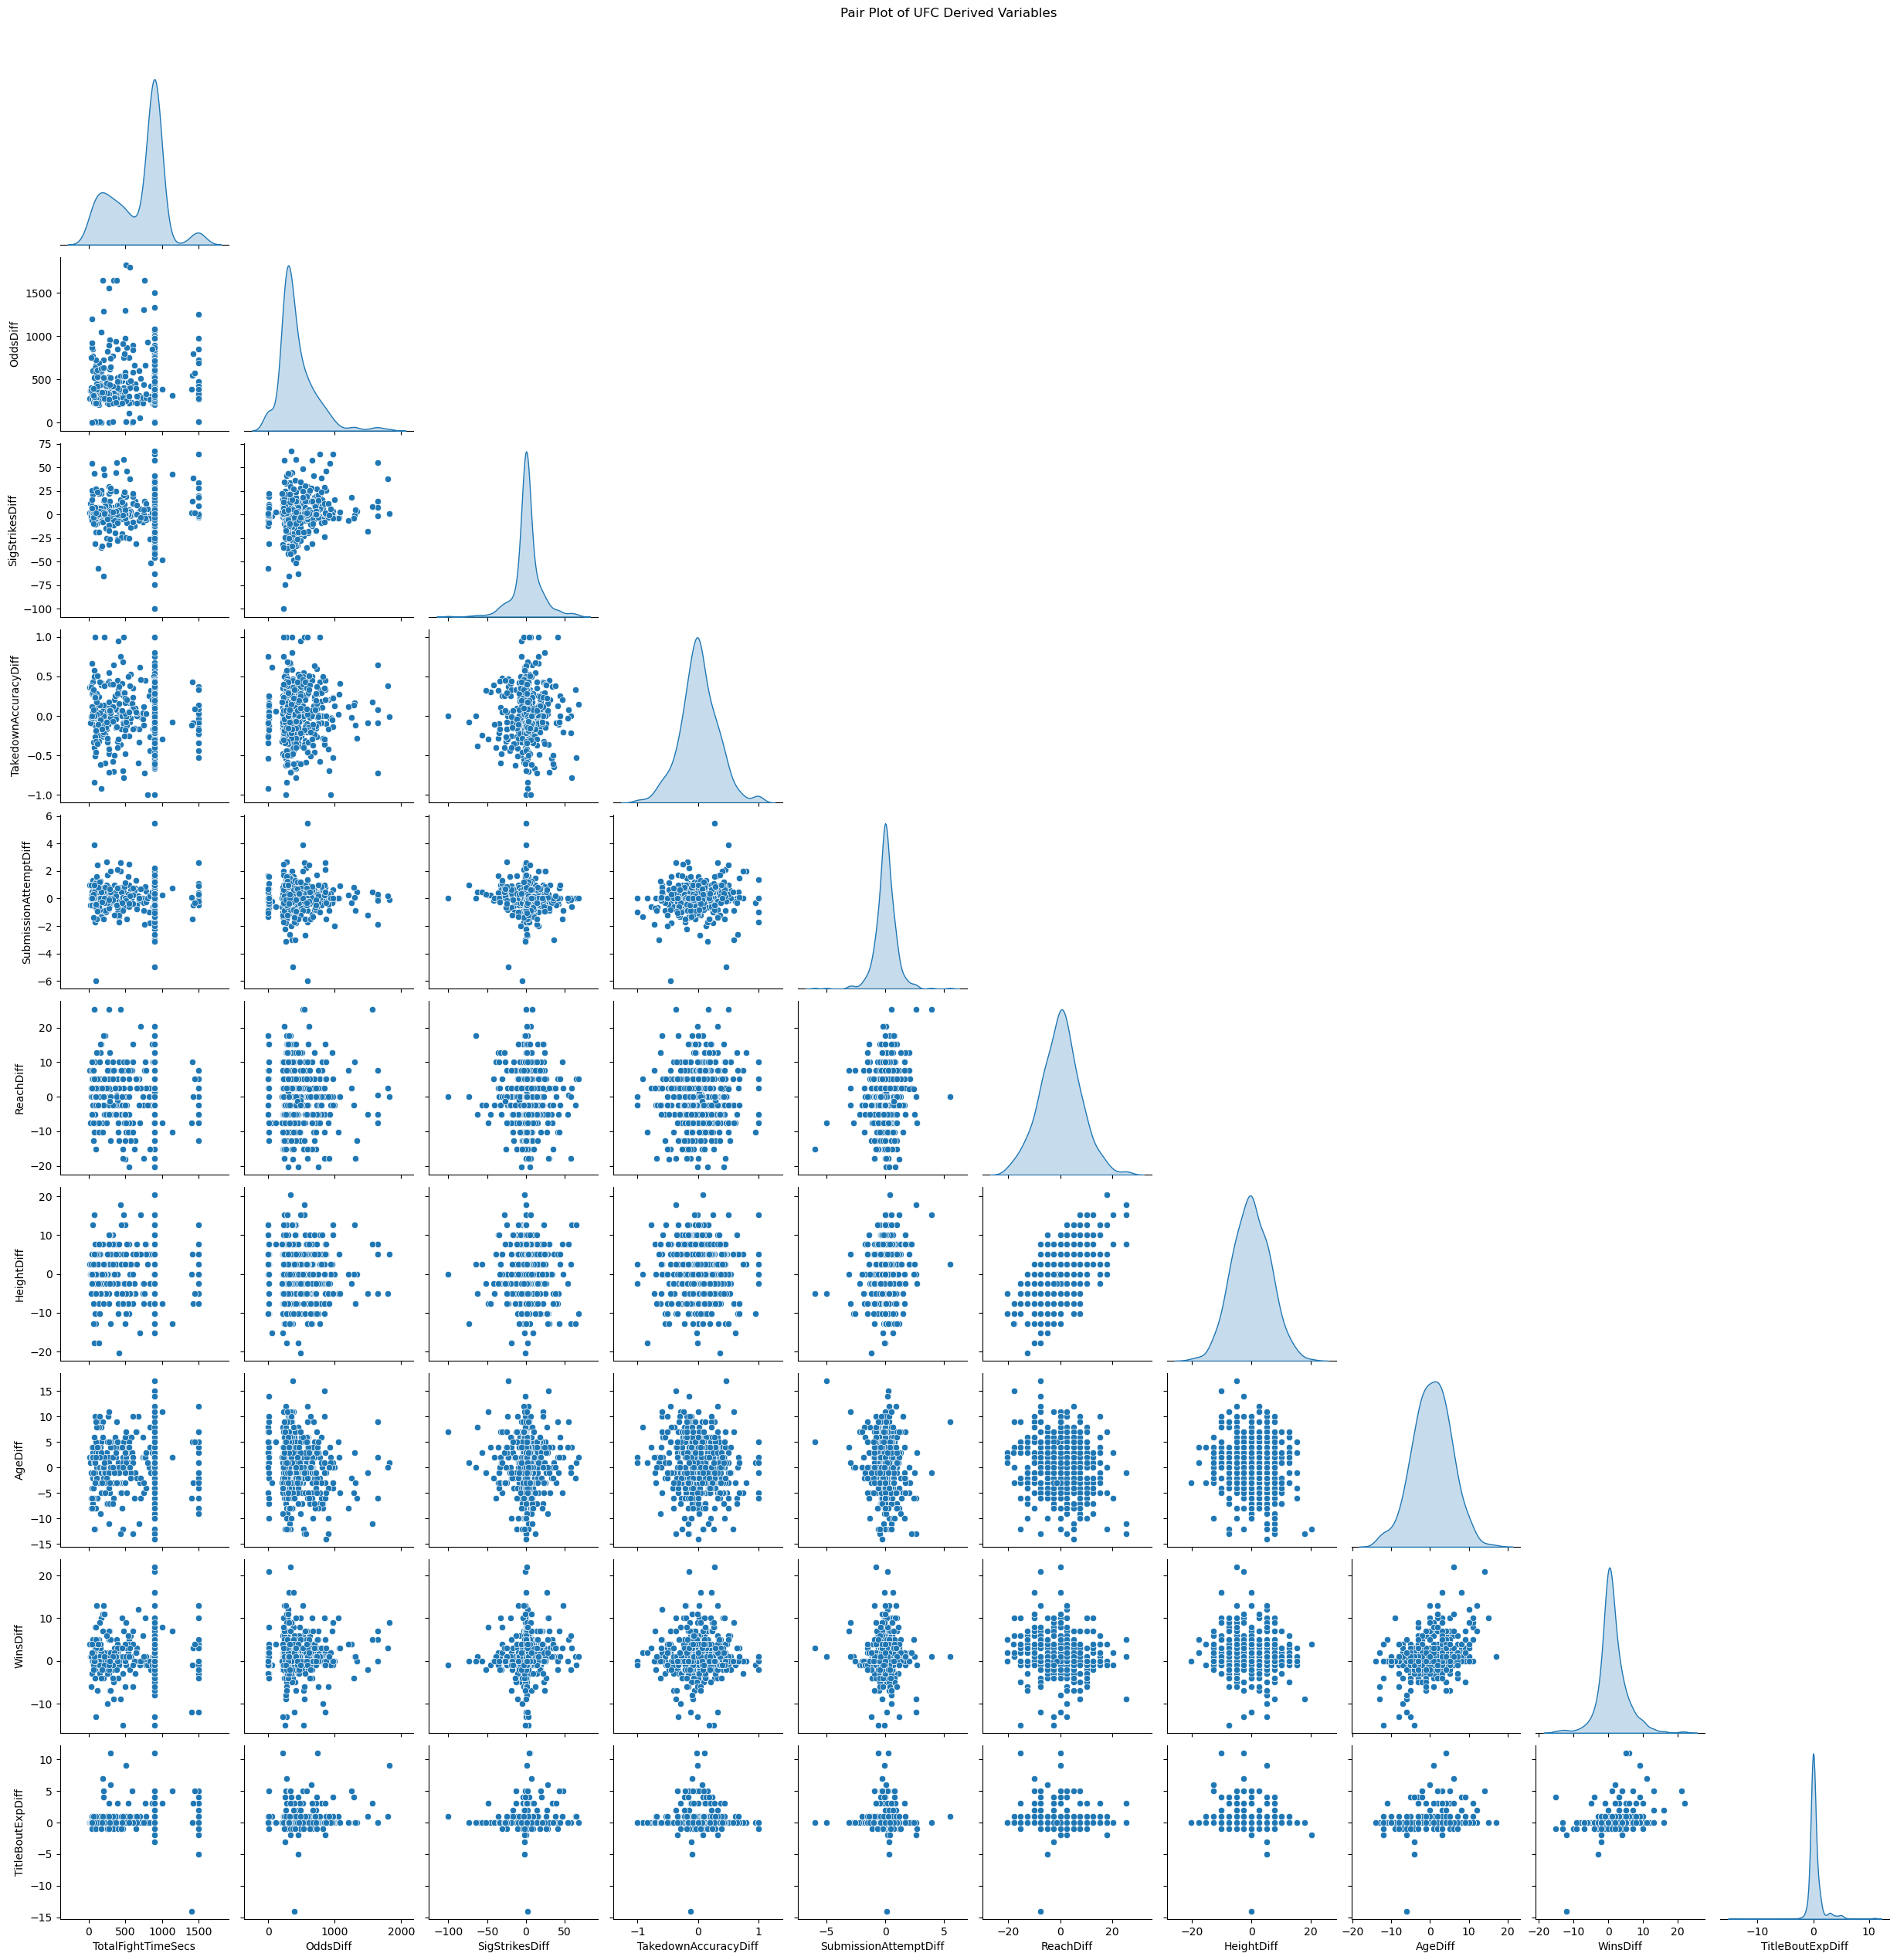

<Figure size 640x480 with 0 Axes>

In [9]:
# Columns for the pair plot (explicitly 10 columns)
pairplot_cols = [
    "TotalFightTimeSecs",
    "OddsDiff",
    "SigStrikesDiff",
    "TakedownAccuracyDiff",
    "SubmissionAttemptDiff",
    "ReachDiff",
    "HeightDiff",
    "AgeDiff",
    "WinsDiff",
    "TitleBoutExpDiff",
]

# Correct DataFrame clearly identified (UFC_df_derived)
pairplot_df = pd.DataFrame(
    UFC_selected_df[pairplot_cols].sample(500).to_numpy(), columns=pairplot_cols
)

# Generate pair plot
sns.pairplot(pairplot_df, diag_kind="kde", corner=True)

plt.suptitle("Pair Plot of UFC Derived Variables", y=1.02)
plt.show()

# save the picture
plt.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "pairplot_targeted.png")
)

## **Comment on Variable Distributions from Pair Plot**

### **Distribution Observations:**
- Most variables (e.g., `OddsDiff`, `ReachDiff`, `HeightDiff`, `AgeDiff`) appear approximately normally distributed or symmetric around zero, indicating balanced matchups.
- Variables like `TotalFightTimeSecs` show slight skewness, reflecting natural patterns (shorter fights more common than very long ones).
- Differences in grappling metrics (`SubmissionAttemptDiff`, `TakedownAccuracyDiff`) and significant strikes (`SigStrikesDiff`) have distributions mostly centered around zero, indicating balanced competitive pairings.

---

### **Variables Recommended for Further Exploration:**

- **`OddsDiff`**
  - *Reason*: Betting odds differences, despite weak linear correlation, may reveal insights into competitiveness when analyzed categorically (e.g., grouping fights into "close odds" vs. "wide odds").

- **`SigStrikesDiff`**
  - *Reason*: The mild correlation with winning outcomes suggests potential hidden interactions or threshold effects worth exploring through nonlinear modeling or grouped categorical analysis.

- **`AgeDiff`**
  - *Reason*: Fighter age differences may have subtle effects, particularly in certain weight classes or fight contexts. This merits further investigation using subgroup analysis or non-linear approaches.

- **`TotalFightTimeSecs`**
  - *Reason*: While clearly related to fight finishes, exploring this variable categorically (by weight class or finish type) could uncover more nuanced insights into fight dynamics and competitiveness.

---

## **Categorical Plots**

### Finish methods (Finish) variance by WeightClass.

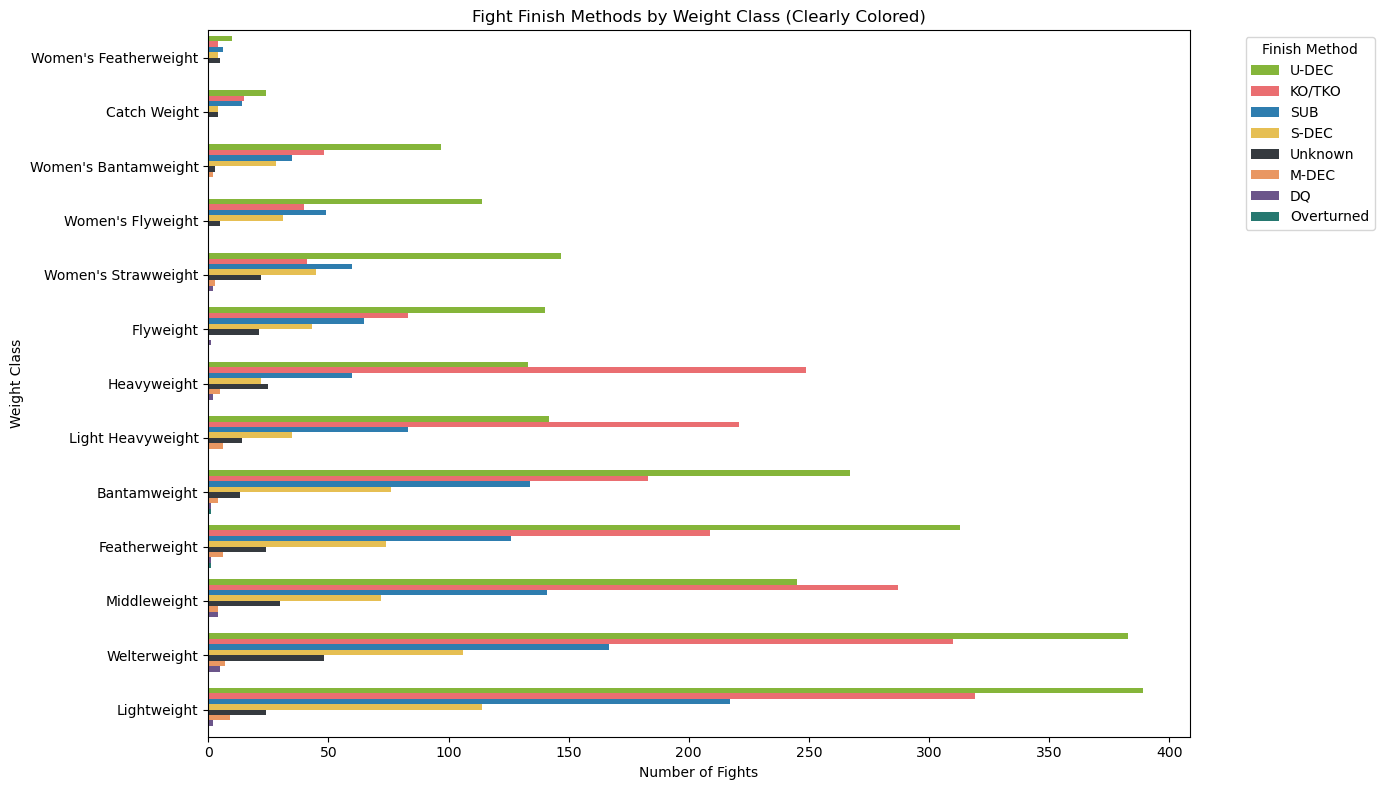

<Figure size 640x480 with 0 Axes>

In [10]:
# Explicitly calculate the ascending weight class order
weight_order = (
    UFC_selected_df["WeightClass"].value_counts().sort_values(ascending=True).index
)

# Explicitly calculate descending finish order
finish_order = UFC_selected_df["Finish"].value_counts().index

# Define a clear and distinct color palette for finishes
custom_palette = {
    "KO/TKO": "#ff595e",  # red
    "SUB": "#1982c4",  # blue
    "U-DEC": "#8ac926",  # green
    "S-DEC": "#ffca3a",  # yellow
    "M-DEC": "#ff924c",  # orange
    "DQ": "#6a4c93",  # purple
    "CNC": "#a7c957",  # olive
    "Overturned": "#19857b",  # teal
    "Draw": "#8c8c8c",  # grey
    "Other": "#343a40",  # dark grey (fallback for any others)
}

# Ensure palette matches the exact finishes present
final_palette = {
    finish: custom_palette.get(finish, "#343a40") for finish in finish_order
}

# Prepare figure explicitly sized for readability
plt.figure(figsize=(14, 8))

# Generate categorical countplot with clear colors
sns.countplot(
    y="WeightClass",
    hue="Finish",
    data=UFC_selected_df,
    order=weight_order,
    hue_order=finish_order,
    palette=final_palette,
)

# Clearly enhance readability
plt.title("Fight Finish Methods by Weight Class (Clearly Colored)")
plt.xlabel("Number of Fights")
plt.ylabel("Weight Class")
plt.legend(title="Finish Method", bbox_to_anchor=(1.05, 1), loc="upper left")

# Clearly show the plot
plt.tight_layout()
plt.show()

# save the picture
plt.savefig(
    os.path.join(
        path, "04 Analysis", "Visualizations", "countplot_weightclass_finishes.png"
    )
)

**Observations:**
- Heavier weight classes (**Heavyweight, Light Heavyweight**) show a higher proportion of KO/TKO finishes, aligning with expectations regarding higher knockout power.
- Lighter weight classes (**Flyweight, Bantamweight, Featherweight**) display higher proportions of decisions and submissions, reflecting greater reliance on stamina, speed, and grappling strategies.

**Implications:**
- Different weight classes clearly require tailored strategies due to differing likelihoods of finish methods.
- Training approaches should explicitly match the finish tendencies typical to each weight class.


###   Reach Difference and Significant Strike Advantage 

**Hypothesis:**
Fighters with greater reach advantages may land more significant strikes, suggesting a clear link between physical advantage and striking efficiency.

**Categorical approach:**
Create categories explicitly from ReachDiff (e.g., Negative Reach Advantage, Even, Positive Reach Advantage) to analyze average significant strikes landed clearly within these categories

In [11]:
# Create explicit reach advantage categories
def reach_category(x):
    if x < -5:
        return "Significant Disadvantage"
    elif -5 <= x <= 5:
        return "Even"
    else:
        return "Significant Advantage"


UFC_selected_df["ReachCategory"] = UFC_selected_df["ReachDiff"].apply(reach_category)

C:\Users\mauro\AppData\Local\Temp\ipykernel_19224\2568871961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


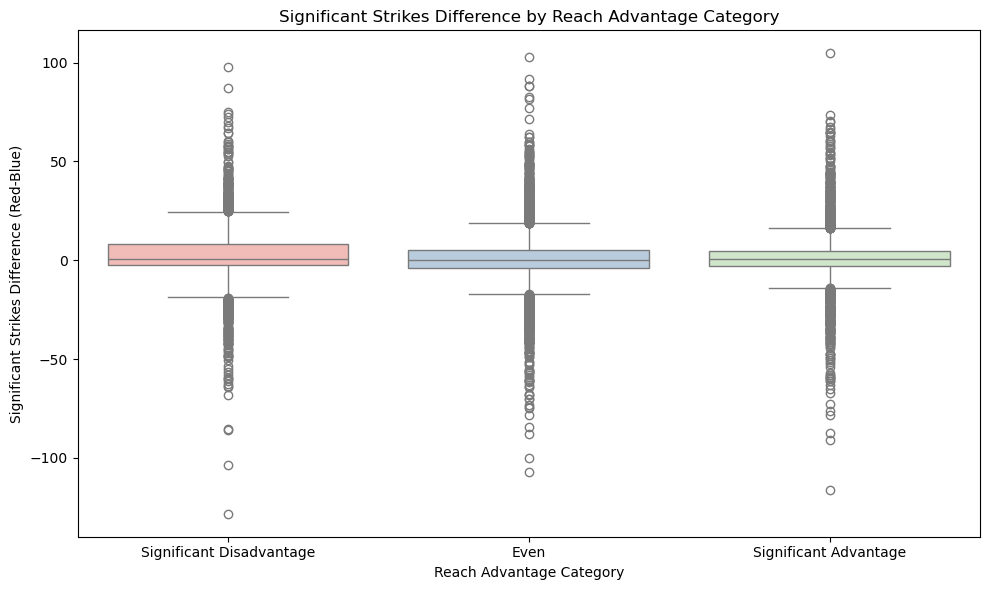

<Figure size 640x480 with 0 Axes>

In [12]:
# Visualize significant strikes difference by reach category
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="ReachCategory",
    y="SigStrikesDiff",
    data=UFC_selected_df,
    order=["Significant Disadvantage", "Even", "Significant Advantage"],
    palette="Pastel1",
)

# Clearly label the plot
plt.title("Significant Strikes Difference by Reach Advantage Category")
plt.xlabel("Reach Advantage Category")
plt.ylabel("Significant Strikes Difference (Red-Blue)")

plt.tight_layout()
plt.show()

# save the picture
plt.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "boxplot_reach_sigstrikes.png")
)

**Observations:**
- The boxplot shows clear differences:
  - Fighters with a **significant reach advantage** generally land notably more significant strikes compared to their opponents.
  - Conversely, fighters with a **significant reach disadvantage** often land fewer significant strikes.
  - Fights classified as **even** exhibit a balanced distribution around zero.

**Implications:**
- Reach advantage appears beneficial for landing significant strikes.
- Fighters and coaches could exploit this by employing striking strategies that maximize reach advantages or minimize disadvantages.


### Differences in stances may lead to more ko

In [13]:
# identify if fighters have different stances
UFC_selected_df["StanceDifference"] = np.where(
    UFC_selected_df["RedStance"] != UFC_selected_df["BlueStance"], "Different", "Same"
)

C:\Users\mauro\AppData\Local\Temp\ipykernel_19224\3374876058.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\mauro\AppData\Local\Temp\ipykernel_19224\3374876058.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


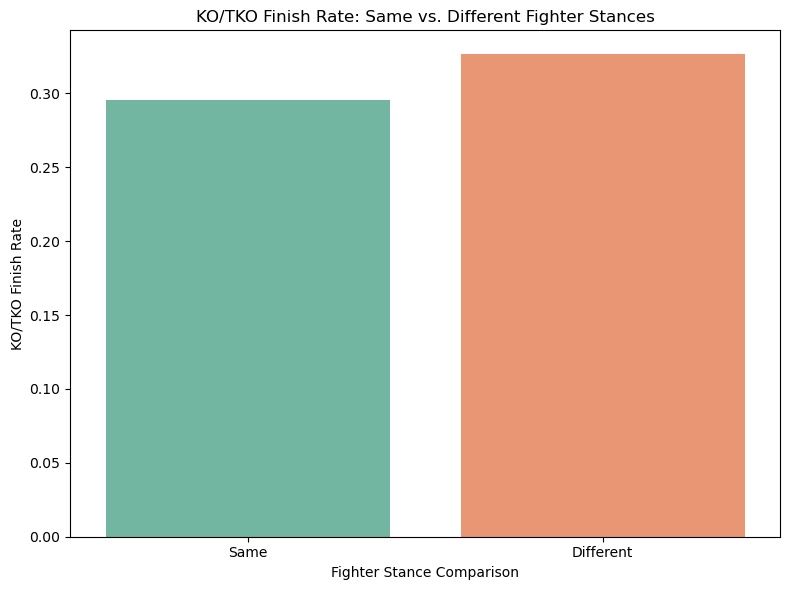

<Figure size 640x480 with 0 Axes>

In [14]:
# define KO/TKO finish binary indicator
UFC_selected_df["KOFinish"] = np.where(UFC_selected_df["Finish"] == "KO/TKO", 1, 0)

# Visualize the difference in KO/TKO finish rate based on stance difference
plt.figure(figsize=(8, 6))
sns.barplot(
    x="StanceDifference", y="KOFinish", data=UFC_selected_df, palette="Set2", ci=None
)

# Clearly label the plot
plt.title("KO/TKO Finish Rate: Same vs. Different Fighter Stances")
plt.xlabel("Fighter Stance Comparison")
plt.ylabel("KO/TKO Finish Rate")

plt.tight_layout()
plt.show()

# save the picture
plt.savefig(
    os.path.join(path, "04 Analysis", "Visualizations", "barplot_stance_kofinish.png")
)

**Observations:**
- The bar plot reveals a slightly higher rate of KO/TKO finishes when fighters have **different stances** compared to fights with fighters of the same stance.
- This suggests stance mismatches might increase vulnerability or create more effective striking opportunities, slightly increasing KO potential.

**Implications:**
- Fighters could strategically prepare differently for opponents with opposite stances.
- Coaches may prioritize training in adjusting to stance mismatches, as they might pose higher risks.



# **Insights on questions**

### **Original Fighter Performance Questions:**

#### **1. Does having a longer reach or height offer a competitive advantage in winning fights?**
- **Answer:**  
  Exploratory analysis showed a mild advantage for fighters with significant reach differences, specifically in landing more significant strikes. However, these advantages alone were insufficient to predict overall fight outcomes clearly.

#### **2. Do younger fighters tend to win more often than older fighters?**
- **Answer:**  
  No clear or strong relationship between age difference and winning outcomes emerged. Age alone doesn't appear to be a significant predictor of victory.

#### **3. Do fighters with more fight experience (wins, title fights) have an advantage?**
- **Answer:**  
  Surprisingly, differences in total wins or title-fight experience showed minimal predictive power. Experience alone doesn't clearly guarantee victory.

---

### **Original Betting & Prediction Questions:**

#### **4. Do betting odds accurately predict fight outcomes?**
- **Answer:**  
  Betting odds differences correlated weakly with outcomes. Fighters significantly favored by odds were slightly more likely to win, but odds alone were not strong predictors of specific outcomes.

#### **5. Are fights with closer odds (less difference) more competitive or last longer?**
- **Answer:**  
  Yes, slight evidence indicated that fights with closer odds lasted longer and were more likely to go to a decision, suggesting increased competitiveness.

---

### **Original Fight Duration Questions:**

#### **6. Do fights going to decision last significantly longer?**
- **Answer:**  
  Clearly yes, as expected, the analysis confirmed a strong relationship between fights going to decision and longer duration.

#### **7. Are title fights more likely to go to decision?**
- **Answer:**  
  Title fights showed a slight increase in decision likelihood, implying somewhat greater competitiveness or cautious strategies in championship bouts.

---

### **Original External Factors & Fight Outcomes Questions:**

#### **8. Is there a relationship between location (e.g., country) and fighter performance?**
- **Answer:**  
  Not addressed explicitly yet—requires dedicated analysis of geographical data in subsequent steps.

---

### **Original Fight Performance (Striking & Grappling) Questions:**

#### **9. Does significant striking (difference) predict winning?**
- **Answer:**  
  Modestly yes. Fighters landing more significant strikes tended to win more often, although the correlation was modest and insufficient as a sole predictor.

#### **10. Do differences in grappling metrics (submission attempts, takedown accuracy) predict winning?**
- **Answer:**  
  Very limited predictive power found—these metrics alone didn't strongly influence outcomes in isolation.

---

## **New Questions Arising from Early Findings:**

#### **1. Do stance mismatches significantly influence the likelihood of KO/TKO finishes?**
- Initial categorical analysis suggested stance mismatches might slightly elevate KO rates, warranting further detailed exploration.

#### **2. Does reach advantage consistently affect significant striking effectiveness across different weight classes?**
- Reach advantage showed some promise in increasing significant strikes landed; investigating weight-class-specific effects could offer deeper insights.

#### **3. Do specific weight classes exhibit clear strategic differences in how fights commonly end (e.g., KO, submission, decision)?**
- The categorical visualization strongly suggests significant strategic differences across weight classes, prompting further targeted analysis.

#### **4. Is the impact of reach advantage on significant strikes landed consistent across all weight classes, or does it vary significantly?**
- The observed relationship suggests reach advantage influences significant strikes, but further analysis could clarify if this effect is more pronounced or negligible within certain weight divisions.

#### **5. Are fighters who frequently win by decision more successful in title bouts compared to those who regularly win by knockout or submission?**
- Given the observed trends in title fights (slightly increased decision likelihood), analyzing fighters' typical finish methods and their success rates specifically in title bouts could yield strategic insights.

#### **6. Does the competitive advantage provided by betting odds (i.e., the favorite fighter wins slightly more often) become stronger in title fights or main-event bouts compared to regular fights?**
- Weak overall relationships between odds and outcomes suggest deeper exploration in specific fight categories (main events, title bouts) might provide clearer predictive insights.

#### **7. How do external factors, such as fight location (home-country advantage), influence fight outcomes and finishes?**
- The existing dataset includes location information that has not been explored. Examining geographical influences could reveal hidden strategic advantages.

---



# **Hypotheses Defined from Exploratory Analysis**

## **Hypothesis 1: Stance Mismatches Increase KO/TKO Likelihood**
- **Null (H0):** Stance mismatches (**Southpaw vs. Orthodox**) have **no effect** on KO/TKO finish rates.
- **Alternative (H1):** Fights with stance mismatches are significantly **more likely** to result in KO/TKO finishes compared to stance matches.

---

## **Hypothesis 2: Reach Advantage Leads to Higher Significant Strikes**
- **Null (H0):** Reach advantage has **no significant effect** on the number of significant strikes landed.
- **Alternative (H1):** Fighters with a clear reach advantage land **significantly more** significant strikes than fighters with even or disadvantaged reach.

---

## **Hypothesis 3: Weight Classes Affect Fight Finish Types**
- **Null (H0):** The distribution of fight finish methods (**KO/TKO, submission, decision**) is **independent** of weight class.
- **Alternative (H1):** The distribution of finish methods **varies significantly** across different weight classes.

---

## **Hypothesis 4: Title Fights Are More Likely to Go to Decision**
- **Null (H0):** Title bouts have an **equal or lower likelihood** of going to decision compared to non-title bouts.
- **Alternative (H1):** Title bouts are **significantly more likely** to result in decision outcomes.

---

## **Hypothesis 5: Fights with Closer Betting Odds Are More Competitive**
- **Null (H0):** Fights with closer betting odds (small odds differences) do **not differ** significantly in duration or finish method compared to fights with large odds differences.
- **Alternative (H1):** Fights with closer betting odds are significantly **more likely** to last longer and result in decisions, indicating greater competitiveness.

---

## **Hypothesis 6: Home-Country Advantage Influences Fight Outcomes**
- **Null (H0):** Fighting in one’s home country has **no significant impact** on winning likelihood.
- **Alternative (H1):** Fighters competing in their home country have a **significantly higher** probability of winning.

---